In [ ]:
# Install the hmmlearn package
!pip install hmmlearn

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read csv file data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Electricity_Consumption_2009_2023.csv', index_col='Datetime', parse_dates=True)
df = df.dropna()

In [ ]:
# Display summary
df.info()
print(df.describe())
print('Shape of data', df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262194 entries, 2009-01-01 00:00:00 to 2023-12-31 23:30:00
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Total Consumption  262194 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB
       Total Consumption
count      262194.000000
mean        32979.071028
std          7607.170735
min         16513.000000
25%         26921.000000
50%         32134.000000
75%         38433.000000
max         60147.000000
Shape of data (262194, 1)


In [ ]:
# Display the first ten rows
print(df.head(10))

                     Total Consumption
Datetime                              
2009-01-01 00:00:00              38704
2009-01-01 00:30:00              38964
2009-01-01 01:00:00              38651
2009-01-01 01:30:00              37775
2009-01-01 02:00:00              37298
2009-01-01 02:30:00              37135
2009-01-01 03:00:00              36844
2009-01-01 03:30:00              35678
2009-01-01 04:00:00              34635
2009-01-01 04:30:00              33934


In [ ]:
# Display the last ten rows
print(df.tail(10))

                     Total Consumption
Datetime                              
2023-12-31 19:00:00              31700
2023-12-31 19:30:00              30496
2023-12-31 20:00:00              29202
2023-12-31 20:30:00              27980
2023-12-31 21:00:00              26723
2023-12-31 21:30:00              25921
2023-12-31 22:00:00              24977
2023-12-31 22:30:00              24134
2023-12-31 23:00:00              23714
2023-12-31 23:30:00              23732


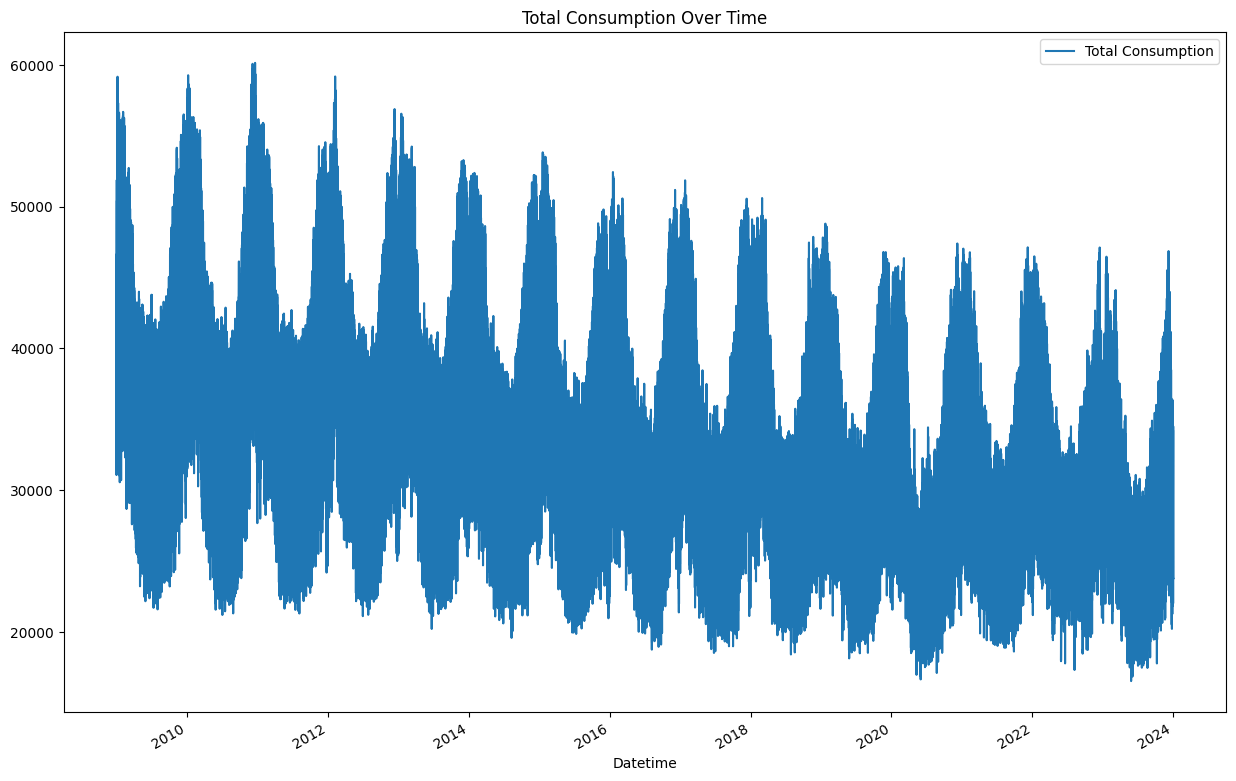

In [ ]:
# Plot the DataFrame
df.plot(figsize=(15, 10))
plt.title('Total Consumption Over Time')
plt.show()

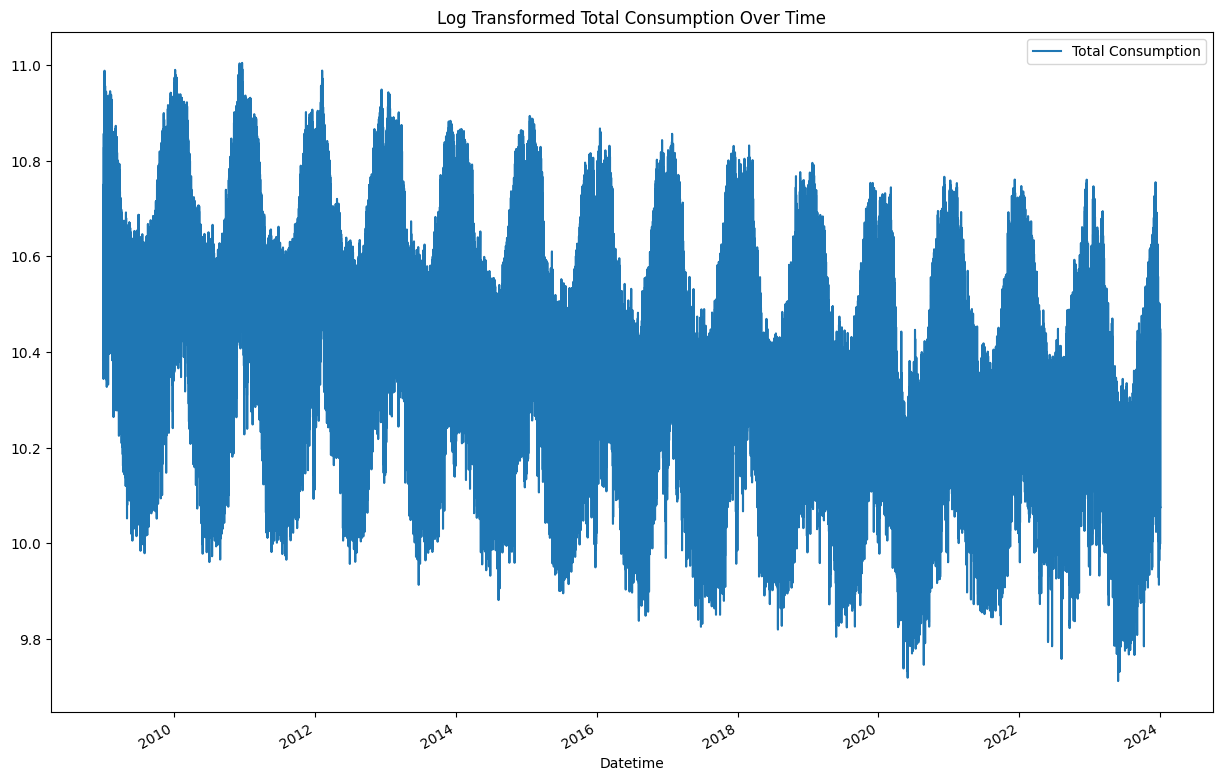

In [ ]:
# Transform the series to stabilize its variance
df = np.log(df)
df.plot(figsize=(15, 10))
plt.title('Log Transformed Total Consumption Over Time')
plt.show()

In [ ]:
# Define the split point
split_point = int(len(df) * 0.8)

In [ ]:
# Split the DataFrame into train and test sets
df_train = df.iloc[:split_point].copy()
df_test = df.iloc[split_point:].copy()

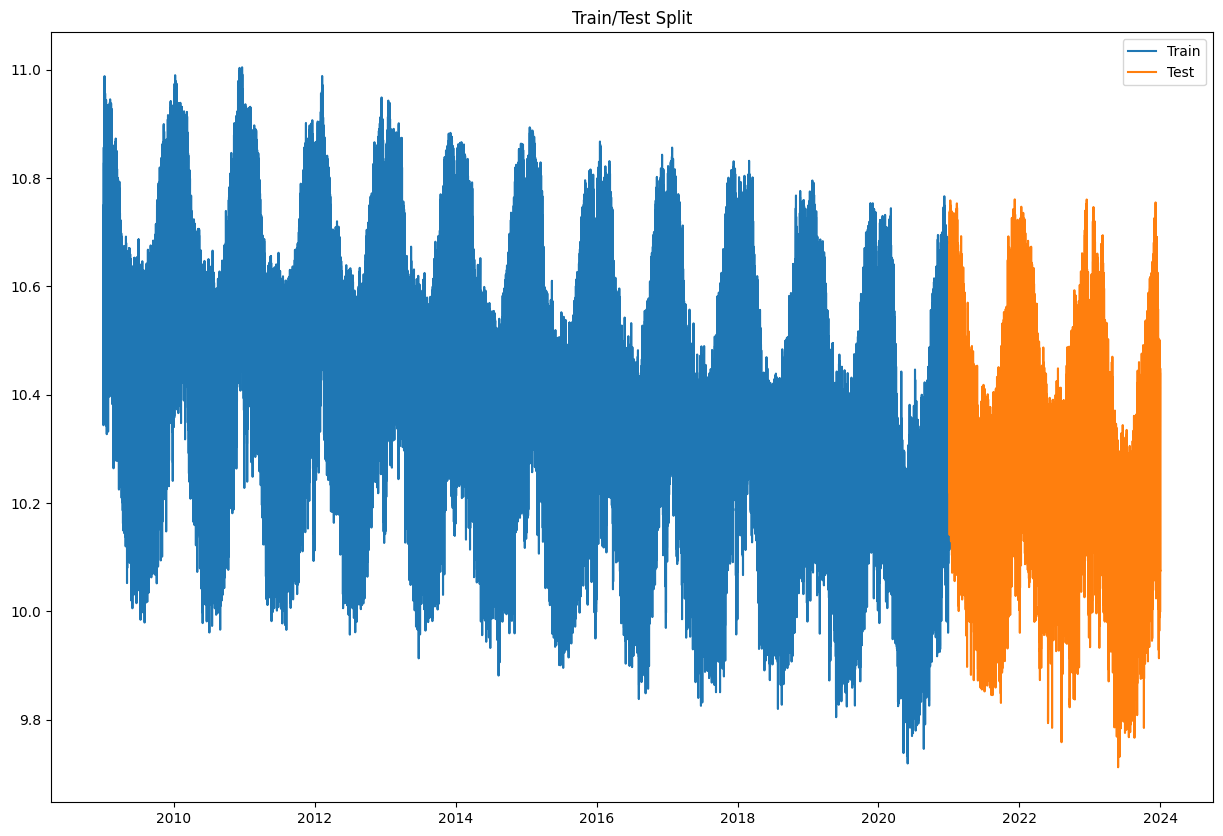

In [ ]:
# Plot the training and testing data to visualize the split
plt.figure(figsize=(15, 10))
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.legend()
plt.title('Train/Test Split')
plt.show()

In [ ]:
# Extract the consumption values
train = df_train['Total Consumption'].values.reshape(-1, 1)
test = df_test['Total Consumption'].values.reshape(-1, 1)

In [ ]:
# Train a Gaussian HMM on the training data
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(train)

GaussianHMM(n_components=4, n_iter=1000)

In [ ]:
# Initialize predicted values list
predicted_values = []

# Forecast the test data by predicting the next value in the sequence
for i in range(len(test)):
    # Use the model to predict the hidden state sequence up to the current test point
    hidden_states = model.predict(np.concatenate([train, test[:i]], axis=0))
    # Derive the predicted value from the means of the hidden states
    next_value = model.means_[hidden_states[-1]][0]
    predicted_values.append(next_value)

predicted_values = np.array(predicted_values)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, predicted_values)
mape = mean_absolute_percentage_error(test, predicted_values)
rmse = np.sqrt(mean_squared_error(test, predicted_values))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

mae: 0.0889701543140909
mape: 0.008708398996114369
rmse: 0.11044285309410407


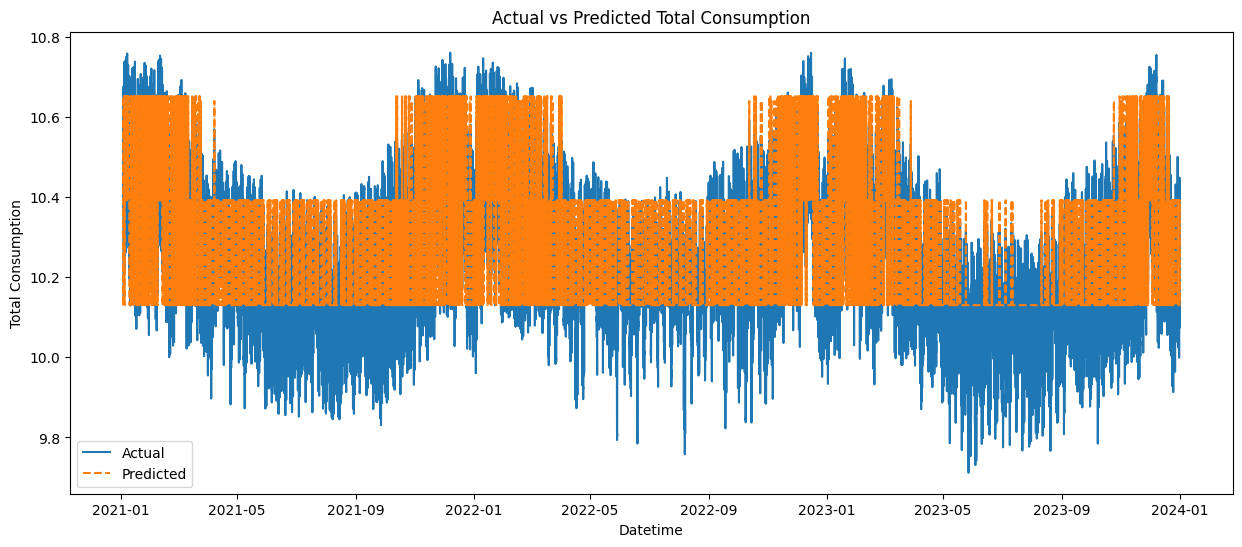

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(df_test.index, test, label='Actual')
plt.plot(df_test.index, predicted_values, label='Predicted', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Total Consumption')
plt.title('Actual vs Predicted Total Consumption')
plt.legend()
plt.show()